# Implementation of Lasso and Ridge Regression using Diamond Dataset and comparing it with Linear Regression

In [214]:
# import the necessary libraries
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

# Machine Learning and Metrics Libraries

pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# load the Boston housing dataset


In [215]:
# Read the dataset
df = pd.read_csv("diamonds.csv")

# Taking a random sample of 1000 observations from the dataset
df = df.sample(n=500, random_state=69)
df.head()

,carat,depth,table,price,Vol,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
47803,0.660,62.800,57.000,1901,107.692,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
25068,1.060,61.900,56.000,13588,172.005,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
518,0.740,63.100,58.000,2824,119.270,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5135,1.000,64.000,53.000,3763,160.853,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
21753,1.500,61.000,60.000,9820,237.136,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [216]:
# Taking a random sample of 1000 observations from the dataset

df = df.sample(n=500, random_state=69)

df.head()

,carat,depth,table,price,Vol,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
17285,1.030,61.200,54.000,6922,170.822,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
11040,0.330,59.700,58.000,594,54.592,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
14063,0.300,63.400,58.000,605,48.359,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
38941,0.310,62.200,59.000,489,51.515,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
47803,0.660,62.800,57.000,1901,107.692,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [217]:
# Checking the correlation of feature with the target variable
df.corr()["price"].sort_values(ascending=False)

price            1.000
Vol              0.898
carat            0.895
cut_Premium      0.103
clarity_SI2      0.094
table            0.086
cut_Good         0.056
color_I          0.047
depth            0.041
clarity_VS2      0.036
color_H          0.033
color_J          0.033
color_G          0.025
clarity_SI1      0.011
clarity_VS1     -0.019
color_F         -0.022
cut_Very Good   -0.032
color_E         -0.050
clarity_VVS2    -0.070
clarity_IF      -0.071
clarity_VVS1    -0.087
cut_Ideal       -0.130
Name: price, dtype: float64

In [218]:
from sklearn.model_selection import train_test_split

X = df.drop(["price"], axis=1)
y = df["price"]

# split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression

Linear Regression RMSE:  1423.7771600930257
Linear Regression R2 score 0.8048616546474462
Linear Regression Coefficients:  [ 7.53104069e+01  4.01894521e+00 -8.10686768e+00  5.63641569e+01
  1.75219576e+02  2.26188616e+02  3.28047317e+02  2.60313168e+02
 -1.70725987e+02 -3.07074717e+02 -5.69809211e+02 -1.28825743e+03
 -1.62796170e+03 -2.30808755e+03  7.62316092e+03  5.66339031e+03
  4.33949001e+03  6.68447834e+03  6.54699223e+03  7.42987140e+03
  7.41246087e+03]
Linear Regression Intercept:  -8832.147252851688


<Axes: xlabel='price'>

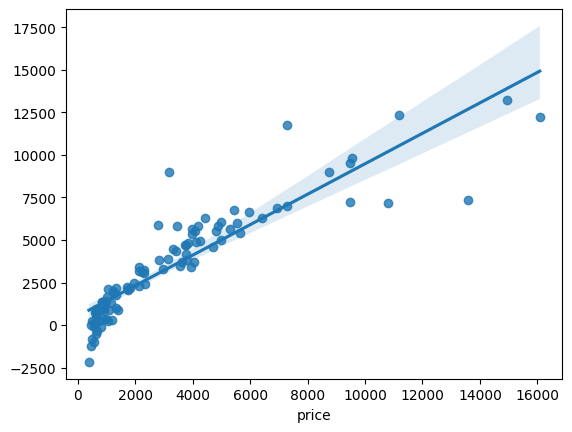

In [219]:
# Applying Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = ridge.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions) ** 0.5
print("Linear Regression RMSE: ", lr_mse)
print("Linear Regression R2 score", r2_score(y_test, lr_predictions))
print("Linear Regression Coefficients: ", lr.coef_)
print("Linear Regression Intercept: ", lr.intercept_)


sns.regplot(x=y_test, y=lr_predictions, fit_reg=True)

# Lasso Regression

alpha:  0.0
coefficients:  [ 4432.74975979   -22.83686332   -18.42126103    29.54887314
   261.30200454   350.71161608   457.1890032    390.70473777
  -180.23982426  -312.23331266  -587.02581172 -1310.31374528
 -1624.60963834 -2343.98047974  7725.92711896  5744.50541529
  4419.85642719  6784.65875863  6638.23044726  7523.50792418
  7498.56934611]
intercept:  -6774.164840895301
R2 Score:  0.8636242635067006
RMSE:  1190.252951933954
----------------------------------------------------
alpha:  0.22448979591836735
coefficients:  [ 3546.52364178   -18.93182582   -16.92713665    34.93640611
   218.50779942   297.87651252   401.73439662   336.10003449
  -166.11669762  -298.84352505  -574.18340034 -1291.72844523
 -1614.23008695 -2321.82099964  7601.10384503  5634.94961866
  4311.53536233  6669.23211592  6525.76287701  7405.96656967
  7382.25926448]
intercept:  -6943.048601891682
R2 Score:  0.8646140907179785
RMSE:  1185.9256047322228
----------------------------------------------------
alpha: 

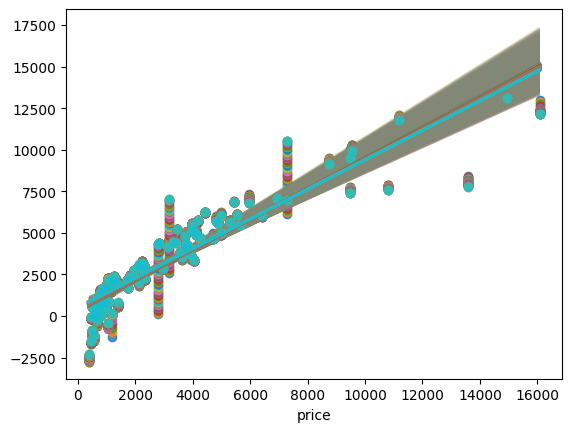

In [220]:
# Apply Lasso Regression and print the coefficients and the intercept of the model
r2_lasso = {}
for aplha in np.linspace(0, 11, 50):
    lasso = Lasso(alpha=aplha)
    lasso.fit(X_train, y_train)
    print("alpha: ", aplha)
    print("coefficients: ", lasso.coef_)
    print("intercept: ", lasso.intercept_)
    print("R2 Score: ", r2_score(y_test, lasso.predict(X_test)))
    r2_lasso[aplha] = r2_score(y_test, lasso.predict(X_test))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))
    print("----------------------------------------------------")
    sns.regplot(x=y_test, y=lasso.predict(X_test))

# Ridge Regression

alpha:  0.0
coefficients:  [ 7.53104069e+01  4.01894521e+00 -8.10686768e+00  5.63641569e+01
  1.75219576e+02  2.26188616e+02  3.28047317e+02  2.60313168e+02
 -1.70725987e+02 -3.07074717e+02 -5.69809211e+02 -1.28825743e+03
 -1.62796170e+03 -2.30808755e+03  7.62316092e+03  5.66339031e+03
  4.33949001e+03  6.68447834e+03  6.54699223e+03  7.42987140e+03
  7.41246087e+03]
intercept:  -8832.14725284867
R2:  0.8637055117983643
RMSE:  1189.8983418348341
----------------------------------------------------
alpha:  0.22448979591836735
coefficients:  [-6.15983527e+02  1.40461599e+01 -5.46692255e+00  5.99269191e+01
  3.57558649e+02  4.08079836e+02  4.68271268e+02  4.27530856e+02
 -1.43310406e+02 -2.71361310e+02 -5.67894580e+02 -1.22482951e+03
 -1.62348436e+03 -2.26941897e+03  6.13433585e+03  4.30735332e+03
  3.02196595e+03  5.29977257e+03  5.17969521e+03  6.00870305e+03
  5.98256464e+03]
intercept:  -8346.927383388485
R2:  0.8721881680453815
RMSE:  1152.2752737035603
------------------------------

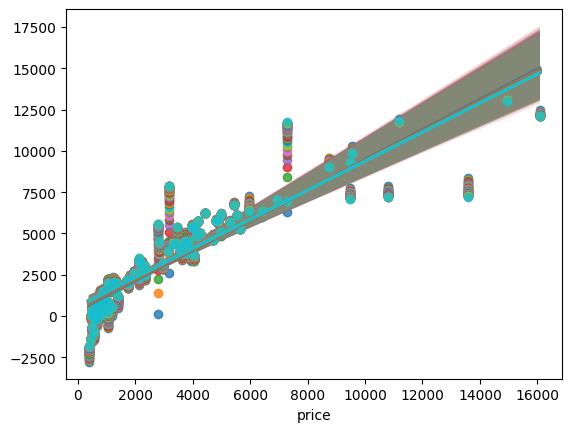

In [221]:
# apply L2 regression and print the coefficients as they will shrink
r2_ridge = {}
for alpha in np.linspace(0, 11, 50):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    print("alpha: ", alpha)
    print("coefficients: ", ridge.coef_)
    print("intercept: ", ridge.intercept_)
    print("R2: ", r2_score(y_test, ridge.predict(X_test)))
    r2_ridge[alpha] = r2_score(y_test, ridge.predict(X_test))
    print("RMSE: ", np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))
    print("----------------------------------------------------")
    sns.regplot(x=y_test, y=ridge.predict(X_test))


In [222]:
r2_lasso

{0.0: 0.8636242635067006,
 0.22448979591836735: 0.8646140907179785,
 0.4489795918367347: 0.8653383808054851,
 0.673469387755102: 0.865797133769221,
 0.8979591836734694: 0.8659903593089515,
 1.1224489795918366: 0.8659180772529669,
 1.346938775510204: 0.8661776693641917,
 1.5714285714285714: 0.8664298714041032,
 1.7959183673469388: 0.8668634216611965,
 2.020408163265306: 0.8672414387475342,
 2.2448979591836733: 0.8675611996868378,
 2.4693877551020407: 0.8678237197665943,
 2.693877551020408: 0.8680274919843707,
 2.9183673469387754: 0.8681760371448414,
 3.142857142857143: 0.8682712790344903,
 3.36734693877551: 0.8683527001291421,
 3.5918367346938775: 0.8684412701434112,
 3.816326530612245: 0.8684730443624529,
 4.040816326530612: 0.8684476712052439,
 4.26530612244898: 0.8683649539407557,
 4.489795918367347: 0.8682243114130419,
 4.714285714285714: 0.8680249573629363,
 4.938775510204081: 0.8677674720371489,
 5.163265306122449: 0.8674694554259825,
 5.387755102040816: 0.8671149545119623,
 5.612

In [223]:
r2_ridge

{0.0: 0.8637055117983643,
 0.22448979591836735: 0.8721881680453815,
 0.4489795918367347: 0.8724371692198621,
 0.673469387755102: 0.8700712514248045,
 0.8979591836734694: 0.8669497597837552,
 1.1224489795918366: 0.8637322980849113,
 1.346938775510204: 0.860658538741065,
 1.5714285714285714: 0.8578079962629966,
 1.7959183673469388: 0.8551963054343641,
 2.020408163265306: 0.8528137145608432,
 2.2448979591836733: 0.8506412381516038,
 2.4693877551020407: 0.848657577079183,
 2.693877551020408: 0.8468420386002418,
 2.9183673469387754: 0.8451756722163476,
 3.142857142857143: 0.8436416028755055,
 3.36734693877551: 0.8422250102330102,
 3.5918367346938775: 0.8409129628772607,
 3.816326530612245: 0.8396942049655605,
 4.040816326530612: 0.8385589397426724,
 4.26530612244898: 0.8374986289469233,
 4.489795918367347: 0.836505814888313,
 4.714285714285714: 0.8355739662476676,
 4.938775510204081: 0.8346973461081734,
 5.163265306122449: 0.8338708997629185,
 5.387755102040816: 0.8330901596286748,
 5.61224

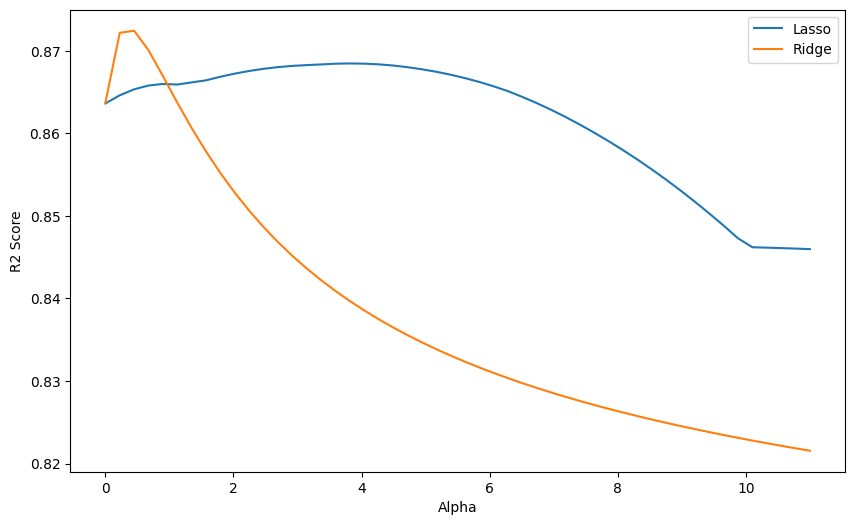

In [224]:
# Plot the R2 scores for both Lasso and Ridge with respect to alpha

plt.figure(figsize=(10, 6))
plt.plot(list(r2_lasso.keys()), list(r2_lasso.values()), label="Lasso")
plt.plot(list(r2_ridge.keys()), list(r2_ridge.values()), label="Ridge")
plt.xlabel("Alpha")
plt.ylabel("R2 Score")
plt.legend()
plt.show()

In [227]:
# Making a Data Frame for thhe RMSE, Bias and Variance for Linear Regression, Lasso and Ridge Regression

compare_df=pd.DataFrame({"RMSE":[],"Bias":[],"Variance":[]})

# Making list of model names and their objects
model_names = [("Linear Regression", lr), ("Lasso Regression", lasso), ("Ridge Regression", ridge)]

for name, model in model_names:
    # Calculating the Bias and Variance
    mse, bias, var = bias_variance_decomp(
        model,
        X_train.values,
        y_train.values,
        X_test.values,
        y_test.values,
        loss="mse",
        num_rounds=200,
        random_seed=1,
    )
    # Calculating the RMSE
    rmse = np.sqrt(mse)
    # Appending the results to the compare_df
    compare_df = compare_df.append(
        pd.DataFrame(
            {"RMSE": rmse, "Bias": bias, "Variance": var}, index=[name]
        )
    )



In [228]:
compare_df

,RMSE,Bias,Variance
Linear Regression,1274.561,1417112.847,207393.395
Lasso Regression,1310.646,1601000.849,116791.911
Ridge Regression,1401.094,1870139.100,92925.001
